# Prediction of Body Fat Percentage 

*Xiaoxiang Hua, xhua24@wisc.edu*  
*YiJie Liu, liu854@wisc.edu*  
*Bi Qing Teng, bteng2@wisc.edu*    

*October 7, 2019*

## Abstract

## Background

Various methods have been used to measure one's health and fitness including waist-to-height ratio, body fat percentage, skin-fold measurements using a caliper, body mass index (BMI) etc.

According to the American Council on Exercise, the percentage of body fat of a normal adult male typically ranges from 18% to 24%. The percentage of body fat can be estimated using the Siri's equation

$$Percent Body Fat = \frac{495}{D}-450$$

where D is the body density which can be accurately measured using underwater hydrostatic weighing procedures. Although this method gives an accurate measurement of the body fat percentage, it is both cumbersome and difficult to measure. 

## Aim

This project aims to study the relationship between body fat percentage and the clinically available measurements and then come up with a simple, robust, accurate and precise "rule-of-thumb" to predict percentage of body fat from a subset of predictors. 

## Data Preparation

The data set **bodyfat.csv** contains 252 observations and 17 variables with no missing data. In particular, the variables are **idno**, **body fat percentage** (%), **body density** (gm/cm$^3$), **age** (years), **weight** (lbs), **height** (inches), **adiposity** (bmi), **neck**, **chest**, **abdomen**, **hip**, **thigh**, **knee, ankle, biceps, forearm** and **wrist** circumferences measured in cm. The weight and height variables were measured to the nearest quarter pound and inch respectively while other variables were measured to the nearest tenth of a centimeter.

In [47]:
rm(list=ls())

# import data
bodyfat_1 = read.csv("bodyfat.csv",sep = ",", header = TRUE)
colnames(bodyfat_1) = tolower(variable.names(bodyfat_1))

# remove idno variable
bodyfat_1 = bodyfat_1[,-1]

# print first and last few observations 
head(bodyfat_1)
tail(bodyfat_1)

# summary of data
summary(bodyfat_1)

bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
247,29.1,1.0308,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,30.7,1.0271,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


    bodyfat         density           age            weight     
 Min.   : 0.00   Min.   :0.995   Min.   :22.00   Min.   :118.5  
 1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75   1st Qu.:159.0  
 Median :19.00   Median :1.055   Median :43.00   Median :176.5  
 Mean   :18.94   Mean   :1.056   Mean   :44.88   Mean   :178.9  
 3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00   3rd Qu.:197.0  
 Max.   :45.10   Max.   :1.109   Max.   :81.00   Max.   :363.1  
     height        adiposity          neck           chest       
 Min.   :29.50   Min.   :18.10   Min.   :31.10   Min.   : 79.30  
 1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35  
 Median :70.00   Median :25.05   Median :38.00   Median : 99.65  
 Mean   :70.15   Mean   :25.44   Mean   :37.99   Mean   :100.82  
 3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38  
 Max.   :77.75   Max.   :48.90   Max.   :51.20   Max.   :136.20  
    abdomen            hip            thigh            knee      
 Min.   : 69.40  

From the summary table above, we noticed something abnormal - the minimum and maximum body fat percentage, the maximum weight and the minimum height. These could be potential outliers and should be examined closely by re-calculating the values using other readily available measurements. 

In [52]:
# extract abnormal observations
min.bf = which.min(bodyfat_1$bodyfat) 
max.bf = which.max(bodyfat_1$bodyfat)
max.weight = which.max(bodyfat_1$weight)
min.height = which.min(bodyfat_1$height)

bodyfat_1[min.bf,]
bodyfat_1[max.bf,]
bodyfat_1[max.weight,]
bodyfat_1[min.height,]

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
182,0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
216,45.1,0.995,51,219,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
42,31.7,1.025,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


Looking at the data set, the 182$^{nd}$ man has 0% body fat. Re-calculating his body fat percentage using the Siri's equation gives a negative value. Thus, we decided to omit this observation as it is impossible for someone to have negative body fat percentage. 

The 216$^{th}$ man has the highest body fat percentage of 45% and the re-calculated body fat gives 47.4%. Also, this man has particularly large value of weight and other body circumferences compared to his peers. On the other hand, observation 39 has the largest weight, 363.1 lbs. The adiposity and height values were used to re-calculate his weight and it showed no error. Hence, observations 216 and 39 were removed as our focus group is normal men.

The 42$^{nd}$ man is 29.50 inches tall. The re-calculated height value is 69.4 inches using adiposity and weight. This value was then corrected in the data set. 

On the other hand, the Siri's equation shows that there exists a linear relationship between percentage of body fat and density. The following plot of body fat percentage against $\frac{1}{Density}$ is obtained to examine whether the two variables in our data set satisfy this relationship.

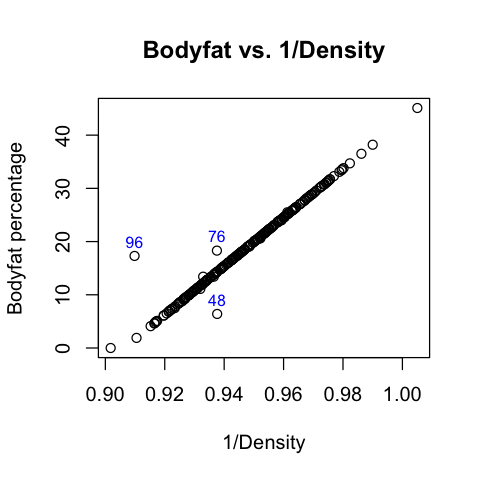

In [89]:
library(IRdisplay)
layout(1)

library(repr)
options(repr.plot.width=4, repr.plot.height=4)

# Plot bodyfat vs 1/density
x = plot( y = bodyfat_1$bodyfat, x = 1/bodyfat_1$density, ylab = "Bodyfat percentage",
      xlab = "1/Density", main = "Bodyfat vs. 1/Density")

# Add labels to points that deviate from straight line
text(1/bodyfat_1$density[48],9,"48",col = "blue",cex=0.8)
text(1/bodyfat_1$density[76],21,"76",col = "blue",cex=0.8)
text(1/bodyfat_1$density[96],20,"96",col = "blue",cex=0.8)

From the plot above, it is obvious that the majority of the points lie on the straight line except for observations 48, 76 and 96. 

In [33]:
# observations on plot that deviate from straight line
bodyfat_1[48,]
bodyfat_1[76,]
bodyfat_1[96,]

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
48,6.4,1.0665,39,148.5,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
76,18.3,1.0666,61,148.25,67.5,22.9,36,91.6,81.8,94.8,54.5,37,21.4,29.3,27,18.3


,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
96,17.3,1.0991,53,224.5,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4


The above table shows the measurements for the three observations. As percentage of body fat can be determined from density using Siri's equation and vice versa, the percentage of body fat for these observations were calculated. The density for observations 48 and 76 are similar and the body fat recalculated is 14.1% (to the nearest tenth) while that for observation 96 is 0.4% which does not make sense considering the high value of other measurements. Thus, we replaced the percentage of body fat for observations 48 and 76 with 14.1% and re-calculated and corrected the density for observation 96 (which is 1.0953). After making these changes, all points lie on the straight line.

After correcting for the height value for observation 42 and body fat percentage for observation 48 and 76, removing density variable and remove observations 39, 182 and 216, the data set now contains 249 observations and 15 variables.

In [53]:
# read data
bodyfat_2 = read.csv("bodyfat_cleaned.csv", sep = ",",header = TRUE, row.names = NULL)

## Variable Selection

### A. Preliminary Analysis

### B. Methods 

Several methods were used to select the best subset of predictors: forward, backward and stepwise selections using AIC and BIC criteria, best subset selection (based on both BIC and *R$^{2}_{adj}$*), Lasso regression as well as Mallow's Cp. 

In [90]:
# full model - multiple linear regression
full.model = lm(bodyfat~., data = bodyfat_2)

# stepwise selection
model.bic.both = step(full.model, direction = "both", k = log(nrow(bodyfat_2)))
model.aic.both = step(full.model, direction = "both", k = 2)

# backward selection
model.bic.backward = step(full.model, direction = "backward", k = log(nrow(bodyfat_2)))
model.aic.backward= step(full.model, direction = "backward", k = 2)

# forward selection
model.bic.forward = step(full.model, direction = "forward", k = log(nrow(bodyfat_2)))
model.aic.forward = step(full.model, direction = "forward", k = 2)

# best subset selection
library(leaps)
bestsubset = regsubsets(bodyfat~., data=bodyfat_2, nvmax=ncol((bodyfat_2)-1))
summary.bestsubset = summary(bestsubset)
model.bestsubset = lm(bodyfat~weight+abdomen+wrist, data=bodyfat_2)

# fit lasso
library(glmnet)
x = model.matrix(bodyfat~., data = bodyfat_2)[,-1]
y = bodyfat_2$bodyfat
model.cv.lasso = cv.glmnet(x, y, family = "gaussian", alpha = 1, type.measure = "mse")

# Mallow's Cp criterion
library(faraway)
mallow_Cp = leaps(x,y,nbest = 1)

Start:  AIC=747.02
bodyfat ~ age + weight + height + adiposity + neck + chest + 
    abdomen + hip + thigh + knee + ankle + biceps + forearm + 
    wrist

            Df Sum of Sq    RSS    AIC
- knee       1      0.00 3587.3 741.50
- height     1      0.48 3587.8 741.54
- adiposity  1      5.42 3592.7 741.88
- ankle      1      5.74 3593.1 741.90
- weight     1      5.98 3593.3 741.92
- biceps     1     16.54 3603.9 742.65
- thigh      1     21.67 3609.0 743.00
- forearm    1     25.01 3612.3 743.23
- chest      1     26.36 3613.7 743.33
- hip        1     27.41 3614.7 743.40
- neck       1     49.77 3637.1 744.93
- age        1     71.15 3658.5 746.39
<none>                   3587.3 747.02
- wrist      1    173.03 3760.4 753.23
- abdomen    1   1433.90 5021.2 825.23

Step:  AIC=741.5
bodyfat ~ age + weight + height + adiposity + neck + chest + 
    abdomen + hip + thigh + ankle + biceps + forearm + wrist

            Df Sum of Sq    RSS    AIC
- height     1      0.49 3587.8 736.02
-

Start:  AIC=694.26
bodyfat ~ age + weight + height + adiposity + neck + chest + 
    abdomen + hip + thigh + knee + ankle + biceps + forearm + 
    wrist

            Df Sum of Sq    RSS    AIC
- knee       1      0.00 3587.3 692.26
- height     1      0.48 3587.8 692.29
- adiposity  1      5.42 3592.7 692.64
- ankle      1      5.74 3593.1 692.66
- weight     1      5.98 3593.3 692.67
- biceps     1     16.54 3603.9 693.40
- thigh      1     21.67 3609.0 693.76
- forearm    1     25.01 3612.3 693.99
- chest      1     26.36 3613.7 694.08
- hip        1     27.41 3614.7 694.15
<none>                   3587.3 694.26
- neck       1     49.77 3637.1 695.69
- age        1     71.15 3658.5 697.15
- wrist      1    173.03 3760.4 703.99
- abdomen    1   1433.90 5021.2 775.99

Step:  AIC=692.26
bodyfat ~ age + weight + height + adiposity + neck + chest + 
    abdomen + hip + thigh + ankle + biceps + forearm + wrist

            Df Sum of Sq    RSS    AIC
- height     1      0.49 3587.8 690.29


Start:  AIC=694.26
bodyfat ~ age + weight + height + adiposity + neck + chest + 
    abdomen + hip + thigh + knee + ankle + biceps + forearm + 
    wrist

            Df Sum of Sq    RSS    AIC
- knee       1      0.00 3587.3 692.26
- height     1      0.48 3587.8 692.29
- adiposity  1      5.42 3592.7 692.64
- ankle      1      5.74 3593.1 692.66
- weight     1      5.98 3593.3 692.67
- biceps     1     16.54 3603.9 693.40
- thigh      1     21.67 3609.0 693.76
- forearm    1     25.01 3612.3 693.99
- chest      1     26.36 3613.7 694.08
- hip        1     27.41 3614.7 694.15
<none>                   3587.3 694.26
- neck       1     49.77 3637.1 695.69
- age        1     71.15 3658.5 697.15
- wrist      1    173.03 3760.4 703.99
- abdomen    1   1433.90 5021.2 775.99

Step:  AIC=692.26
bodyfat ~ age + weight + height + adiposity + neck + chest + 
    abdomen + hip + thigh + ankle + biceps + forearm + wrist

            Df Sum of Sq    RSS    AIC
- height     1      0.49 3587.8 690.29


Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



The following table shows the subset of variables selected by each method. It is shown that the two variables abdomen and wrist are selected by all methods, suggesting that these variables are important in predicting body fat percentage.

| method | age | weight | height | adiposity | neck | chest |  abdomen | hip | thigh | knee | ankle | biceps| forearm | wrist |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|stepwise (BIC) | | | <ul><li> | | | | <ul><li> | | | | | | | <ul><li> |
|stepwise (AIC) | <ul><li> | | <ul><li> | <ul><li> |<ul><li> | <ul><li> | <ul><li> | <ul><li> | | | | |<ul><li> |<ul><li> |
|backward (BIC) |<ul><li> | | | | | |<ul><li> | | | | | | |<ul><li>|
|backward (AIC) | <ul><li>| | |<ul><li> |<ul><li> | <ul><li>|<ul><li> |<ul><li> | | | | | <ul><li>|<ul><li> |
|forward (BIC)  | <ul><li>| <ul><li>|<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |
|forward (AIC)  | <ul><li>| <ul><li>|<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |<ul><li> |
|best subset    | | <ul><li>| | | | | <ul><li>| | | | | | |<ul><li> |
|Lasso          | <ul><li>| |<ul><li> | | | | <ul><li>| | | | | | | <ul><li>|
|Mallow's Cp    | <ul><li>| | <ul><li>| | | <ul><li>| <ul><li>| | | | | <ul><li>| | <ul><li>|

## Statistical Analysis

### A. Best Model Fitting

### B. Residual Diagnostics

#### 1. Checking for Influential Points

#### 2. Checking for Normality

#### 3. Checking for Independence

### C. Model Validation

## Interpretation

#### Strengths and Weaknesses

## Conclusion

## Reference